In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
pd.options.display.max_rows = 999
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('pokemon.csv')
data.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate   classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45    Seed Pokémon       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45  grass  poison        6.9           1             0
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45    Seed Pokémon       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60  grass  poison       13.0           1             0
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45    Seed Pokémon      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80  grass  poison      100.0           1             0
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45  Lizard Pokémon       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65   fire     NaN        8.5           1             0
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45   Flame Pokémon       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80   fire     NaN       19.0           1             0

In [3]:
len(data[data['height_m'].isnull()].index)/len(data)*100


2.4968789013732833

In [4]:
len(data[data['weight_kg'].isnull()].index)/len(data)*100

2.4968789013732833

In [5]:
data.drop(data[data['height_m'].isnull()].index,inplace=True)

In [6]:
data.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate   classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45    Seed Pokémon       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45  grass  poison        6.9           1             0
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45    Seed Pokémon       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60  grass  poison       13.0           1             0
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45    Seed Pokémon      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80  grass  poison      100.0           1             0
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45  Lizard Pokémon       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65   fire     NaN        8.5           1             0
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45   Flame Pokémon       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80   fire     NaN       19.0           1             0

In [7]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       97
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                383
weight_kg              0
generation             0


In [8]:
data['percentage_male'].fillna(np.int(-1), inplace=True)

In [9]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                383
weight_kg              0
generation             0


In [10]:
data['type2'].fillna('NA', inplace=True)

<BarContainer object of 18 artists>

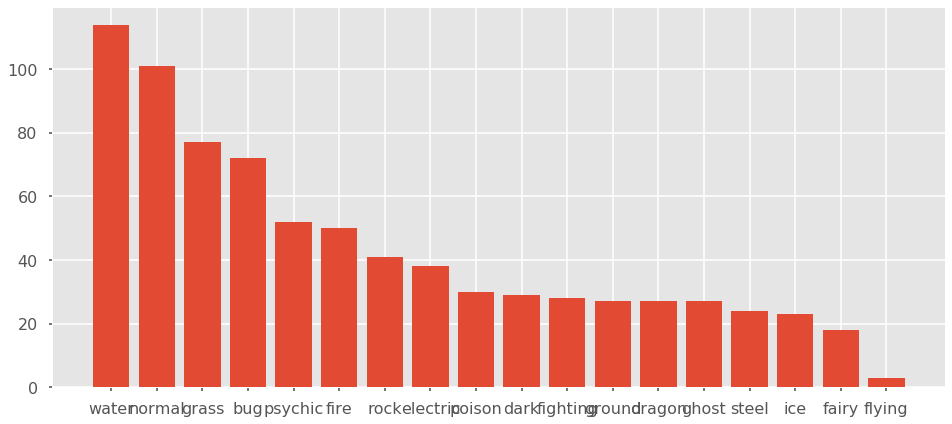

In [11]:
type1 = pd.value_counts(data['type1'])
fig, ax = plt.subplots()
fig.set_size_inches(16, 7)
plt.bar(x=type1.index , height= type1)

Text(0, 0.5, 'Pokemon count')

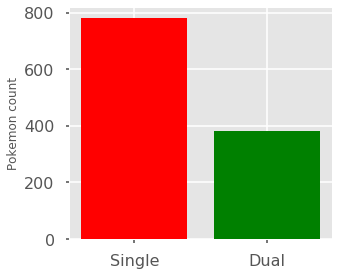

In [12]:
my_colors = 'rg'  
fig, ax = plt.subplots()
fig.set_size_inches(4.7, 4.27)
plt.bar(x=['Single','Dual'] , height=[data['type1'].count(),(data['type2'] == 'NA').sum()],color=my_colors)
plt.ylabel('Pokemon count')

In [13]:
data.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate   classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45    Seed Pokémon       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45  grass  poison        6.9           1             0
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45    Seed Pokémon       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60  grass  poison       13.0           1             0
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45    Seed Pokémon      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80  grass  poison      100.0           1             0
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45  Lizard Pokémon       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65   fire      NA        8.5           1             0
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45   Flame Pokémon       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80   fire      NA       19.0           1             0

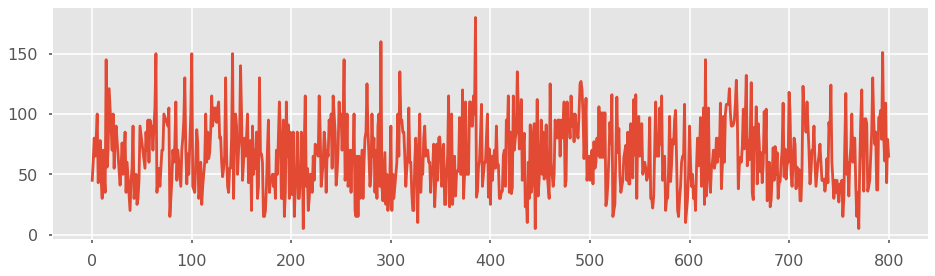

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 4.27)
plt.plot( data['speed'])

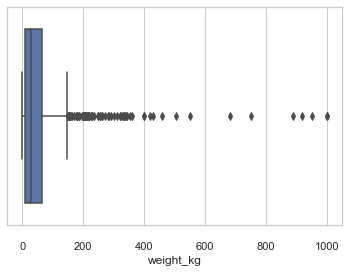

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data['weight_kg'])

In [16]:
data.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate   classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45    Seed Pokémon       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45  grass  poison        6.9           1             0
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45    Seed Pokémon       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60  grass  poison       13.0           1             0
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45    Seed Pokémon      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80  grass  poison      100.0           1             0
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45  Lizard Pokémon       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65   fire      NA        8.5           1             0
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45   Flame Pokémon       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80   fire      NA       19.0           1             0

In [17]:
columns = ['speed','defense','height_m','hp','sp_attack','sp_defense','weight_kg']

In [18]:
consolidate = data.groupby('type1').mean()[columns]

In [19]:
columns

['speed', 'defense', 'height_m', 'hp', 'sp_attack', 'sp_defense', 'weight_kg']

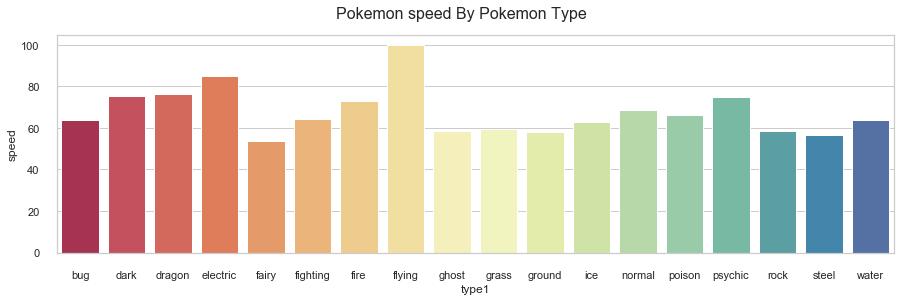

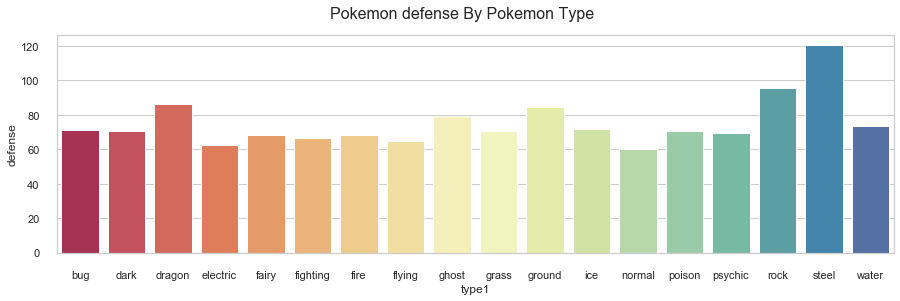

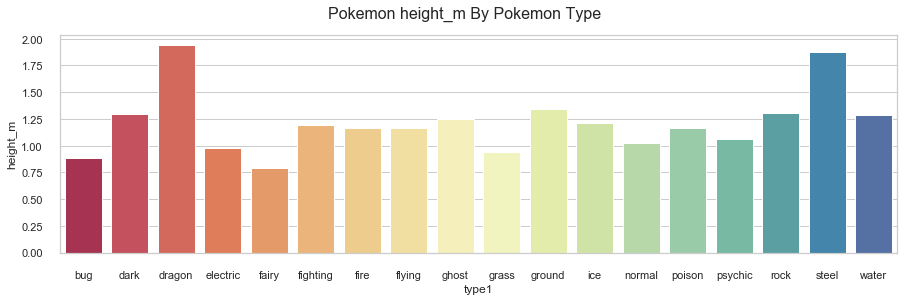

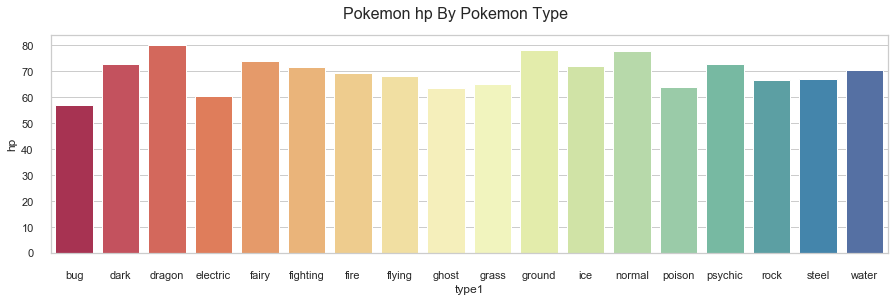

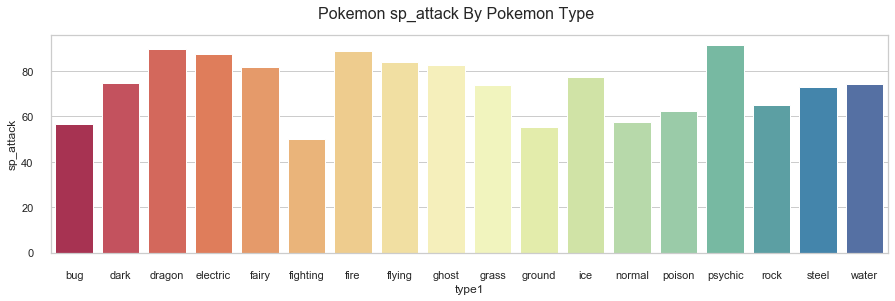

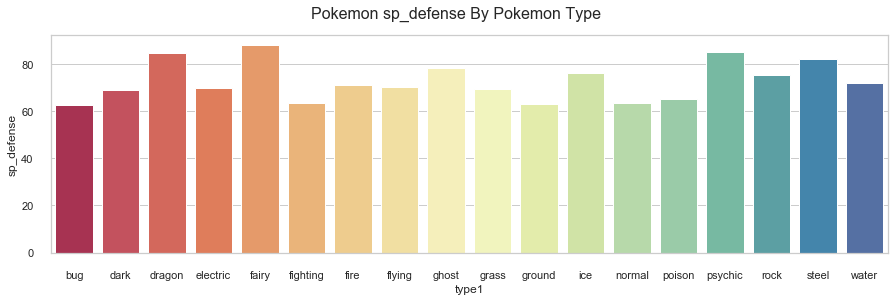

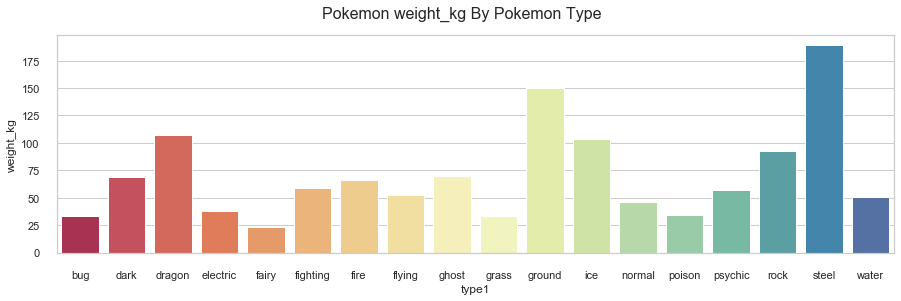

In [20]:
for col in columns:
    plt.figure(figsize=(15,4))

    sns.barplot(x=consolidate.index,y=consolidate.loc[:,col], palette='Spectral')

    sns.barplot(x=consolidate.index,y=consolidate.loc[:,col], palette='Spectral')

    plt.suptitle('Pokemon '+col+' By Pokemon Type', fontsize=16)

In [21]:
data.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate   classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318           45    Seed Pokémon       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45  grass  poison        6.9           1             0
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405           45    Seed Pokémon       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60  grass  poison       13.0           1             0
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625           45    Seed Pokémon      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80  grass  poison      100.0           1             0
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309           45  Lizard Pokémon       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65   fire      NA        8.5           1             0
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405           45   Flame Pokémon       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80   fire      NA       19.0           1             0

In [22]:
consolidate_by_gen = data.groupby('generation').mean()[columns]

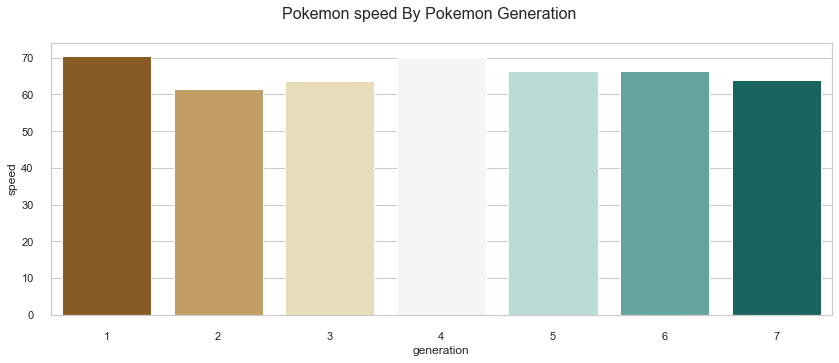

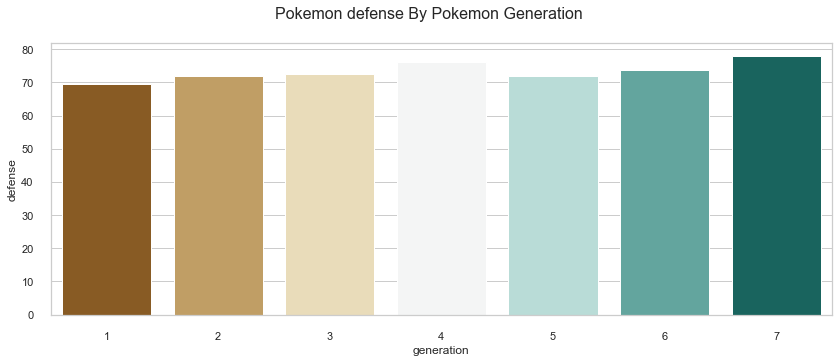

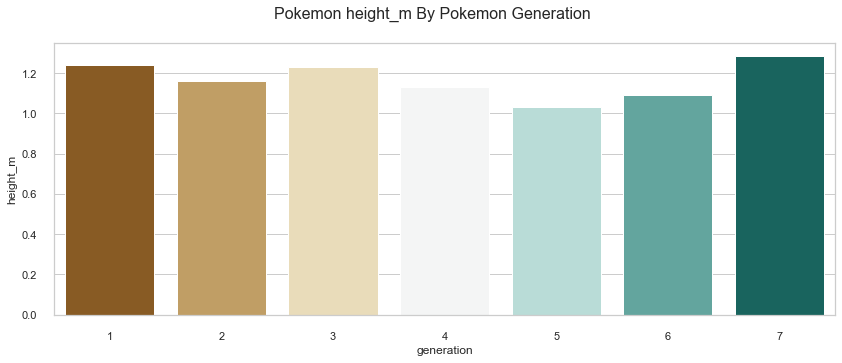

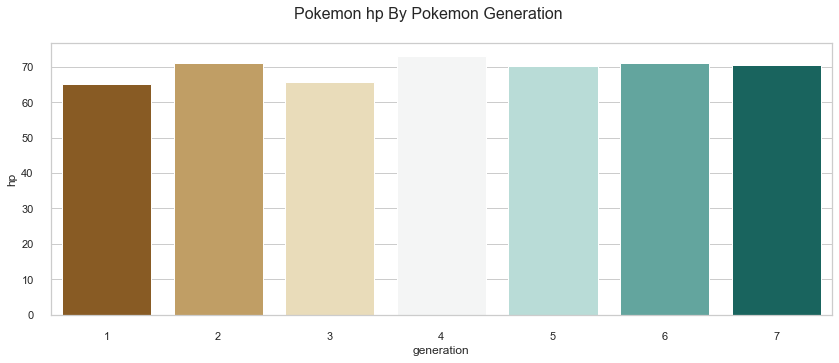

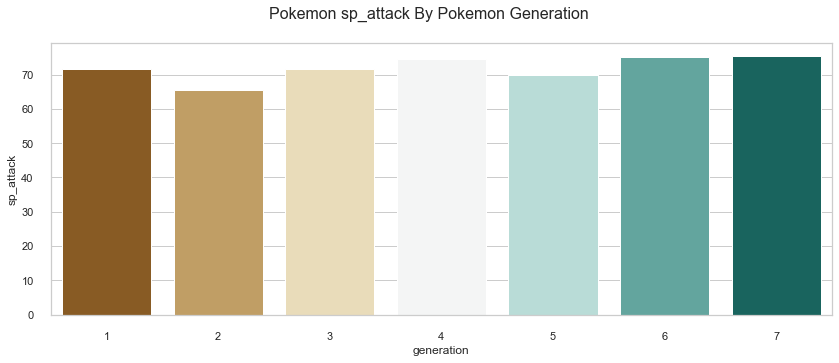

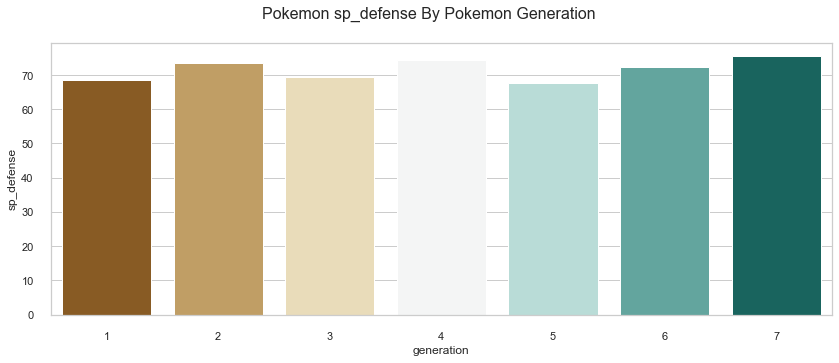

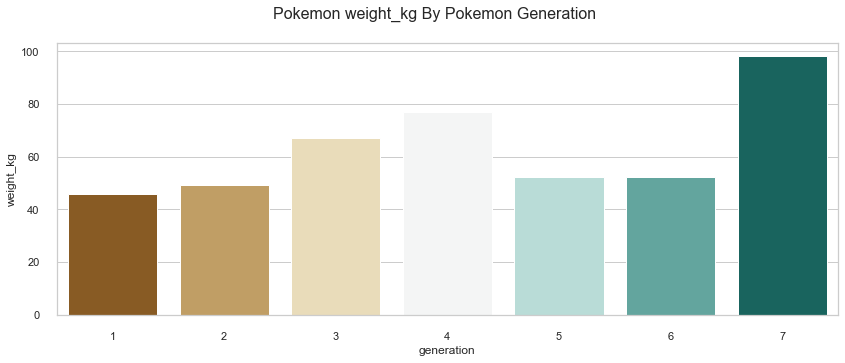

In [23]:

for col in columns:
    plt.figure(figsize=(14,5))
    sns.barplot(x=consolidate_by_gen.index,y=consolidate_by_gen.loc[:,col], palette=sns.color_palette("BrBG", 7))

    sns.barplot(x=consolidate_by_gen.index,y=consolidate_by_gen.loc[:,col], palette=sns.color_palette("BrBG", 7))

    plt.suptitle('Pokemon '+col+' By Pokemon Generation', fontsize=16)


In [24]:
groupbyTyep1 = data.groupby('type1').mean().iloc[:,:18]
groupbyTyep1

against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water
type1                                                                                                                                                                                                                                                                                    
bug          0.826389      0.979167        0.937500          1.138889       0.916667       0.458333      2.194444        2.083333       1.013889       0.420139        0.562500     1.208333        0.930556        0.930556         1.159722      2.291667       0.972222       1.020833
dark         1.724138      0.534483        1.103448          1.103448       2.275862       1.965517      1.034483        1.034483       0.551724       0.775862        0.965517     1.206897        0.931034        0.913793         0.000000      1.241379       1.000000       1.000000
dragon       0.944444      1.037037        2.000000          0.490741       2.111111       0.925926      0.509259        1.055556       1.074074       0.527778        0.925926     2.518519        1.000000        0.925926         1.037037      1.111111       1.000000       0.592593
electric     0.868421      1.000000        0.894737          0.539474       0.947368       1.065789      1.105263        0.473684       0.973684       0.907895        2.052632     1.026316        0.921053        0.934211         0.947368      1.026316       0.500000       1.000000
fairy        0.472222      0.500000        0.000000          1.111111       1.000000       0.472222      1.000000        1.000000       1.000000       0.944444        0.888889     1.111111        1.000000        2.000000         1.000000      1.111111       2.000000       1.000000
fighting     0.535714      0.526786        0.982143          1.035714       2.035714       1.053571      1.071429        1.964286       1.053571       0.964286        1.000000     1.000000        0.982143        0.964286         1.821429      0.526786       1.017857       1.000000
fire         0.455000      0.950000        1.010000          1.090000       0.575000       1.030000      0.495000        1.100000       0.970000       0.500000        1.840000     0.580000        0.980000        0.950000         1.080000      2.060000       0.500000       2.080000
flying       0.500000      1.000000        1.666667          1.333333       1.666667       0.500000      0.666667        1.000000       1.000000       0.333333        0.000000     3.333333        1.000000        1.000000         1.000000      2.000000       1.000000       0.666667
ghost        0.527778      1.925926        1.000000          0.888889       0.962963       0.000000      1.111111        1.185185       1.962963       0.814815        1.055556     1.314815        0.000000        0.564815         1.074074      1.148148       0.981481       1.074074
grass        1.688312      0.954545        0.915584          0.532468       0.967532       0.922078      2.129870        2.038961       1.006494       0.431818        0.571429     2.116883        0.967532        1.844156         1.155844      1.058442       1.071429       0.506494
ground       1.074074      1.092593        1.055556          0.000000       1.166667       1.092593      0.944444        0.907407       1.092593       2.000000        1.074074     2.333333        0.851852        0.435185         0.833333      0.546296       1.074074       2.148148
ice          1.021739      1.130435        1.000000          1.086957       1.000000       1.739130      1.869565        1.000000       1.130435       1.217391        0.913043     0.576087        0.956522        0.913043         0.956522      2.043478       1.869565       1.065217
normal       0.891089      1.000000        0.970297          1

In [25]:
pokemon = data[:]

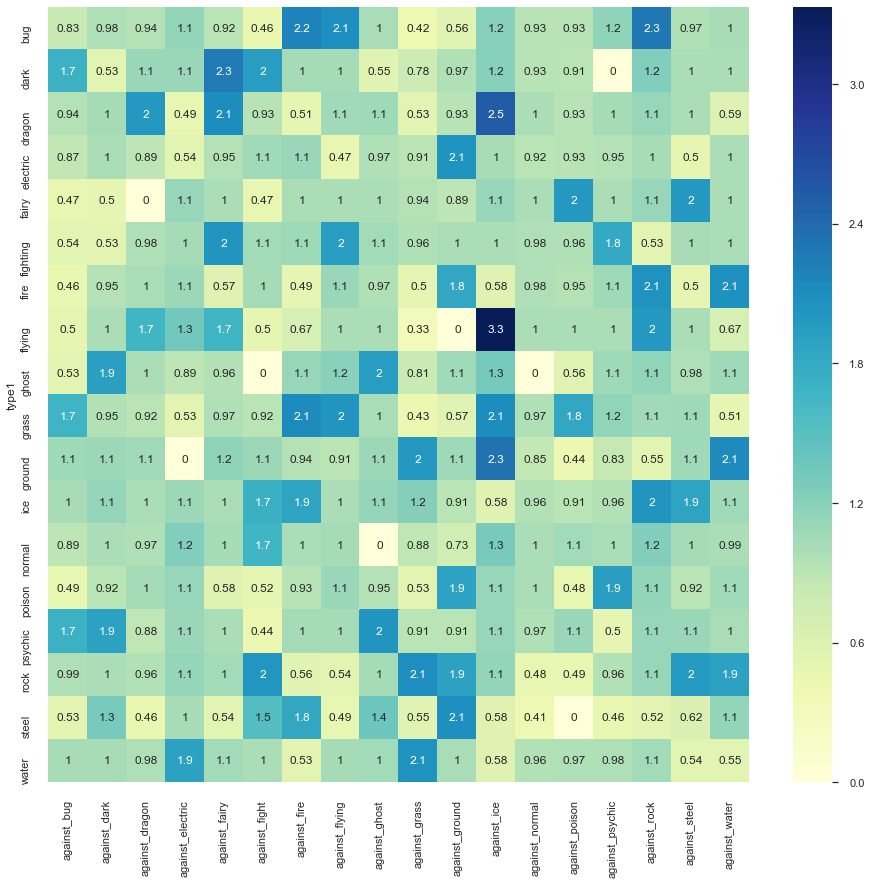

In [26]:
data = groupbyTyep1
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 14.27)
corr = data
ax = sns.heatmap(data, annot=True,cmap="YlGnBu")

In [27]:
pokemon.iloc[753,23] =30

In [28]:
pokemon[pokemon.index == 773]

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total capture_rate   classfication  defense  experience_growth  height_m  hp japanese_name    name  percentage_male  pokedex_number  sp_attack  sp_defense  speed type1   type2  weight_kg  generation  is_legendary
773  ['Shields Down']          0.5           1.0             1.0               2.0            1.0            1.0           0.5             0.5            1.0            1.0             0.0          2.0             0.5             0.5              1.0           2.0            2.0            2.0     100            6400              70         500           30  Meteor Pokémon       60            1059860       0.3  60     Metenoメテノ  Minior             -1.0             774        100          60    120  rock  flying       40.0           7             0

In [29]:
pokemon['capture_rate'] = pokemon['capture_rate'].astype('int32')

In [30]:
np.dtype(pokemon['capture_rate'])

dtype('int32')

In [31]:
pokemon[['generation','name','capture_rate']].groupby('generation').mean().head(10)

capture_rate
generation              
1             101.593985
2              91.900000
3             113.355556
4              78.859813
5             103.102564
6             101.774648
7              84.443038

In [32]:
pokemon[['type1','name','capture_rate']].groupby('type1').mean().head(10)

capture_rate
type1                 
bug         119.833333
dark         84.482759
dragon       37.333333
electric    107.815789
fairy       116.944444
fighting    103.750000
fire         70.000000
flying       79.333333
ghost        93.814815
grass       107.740260

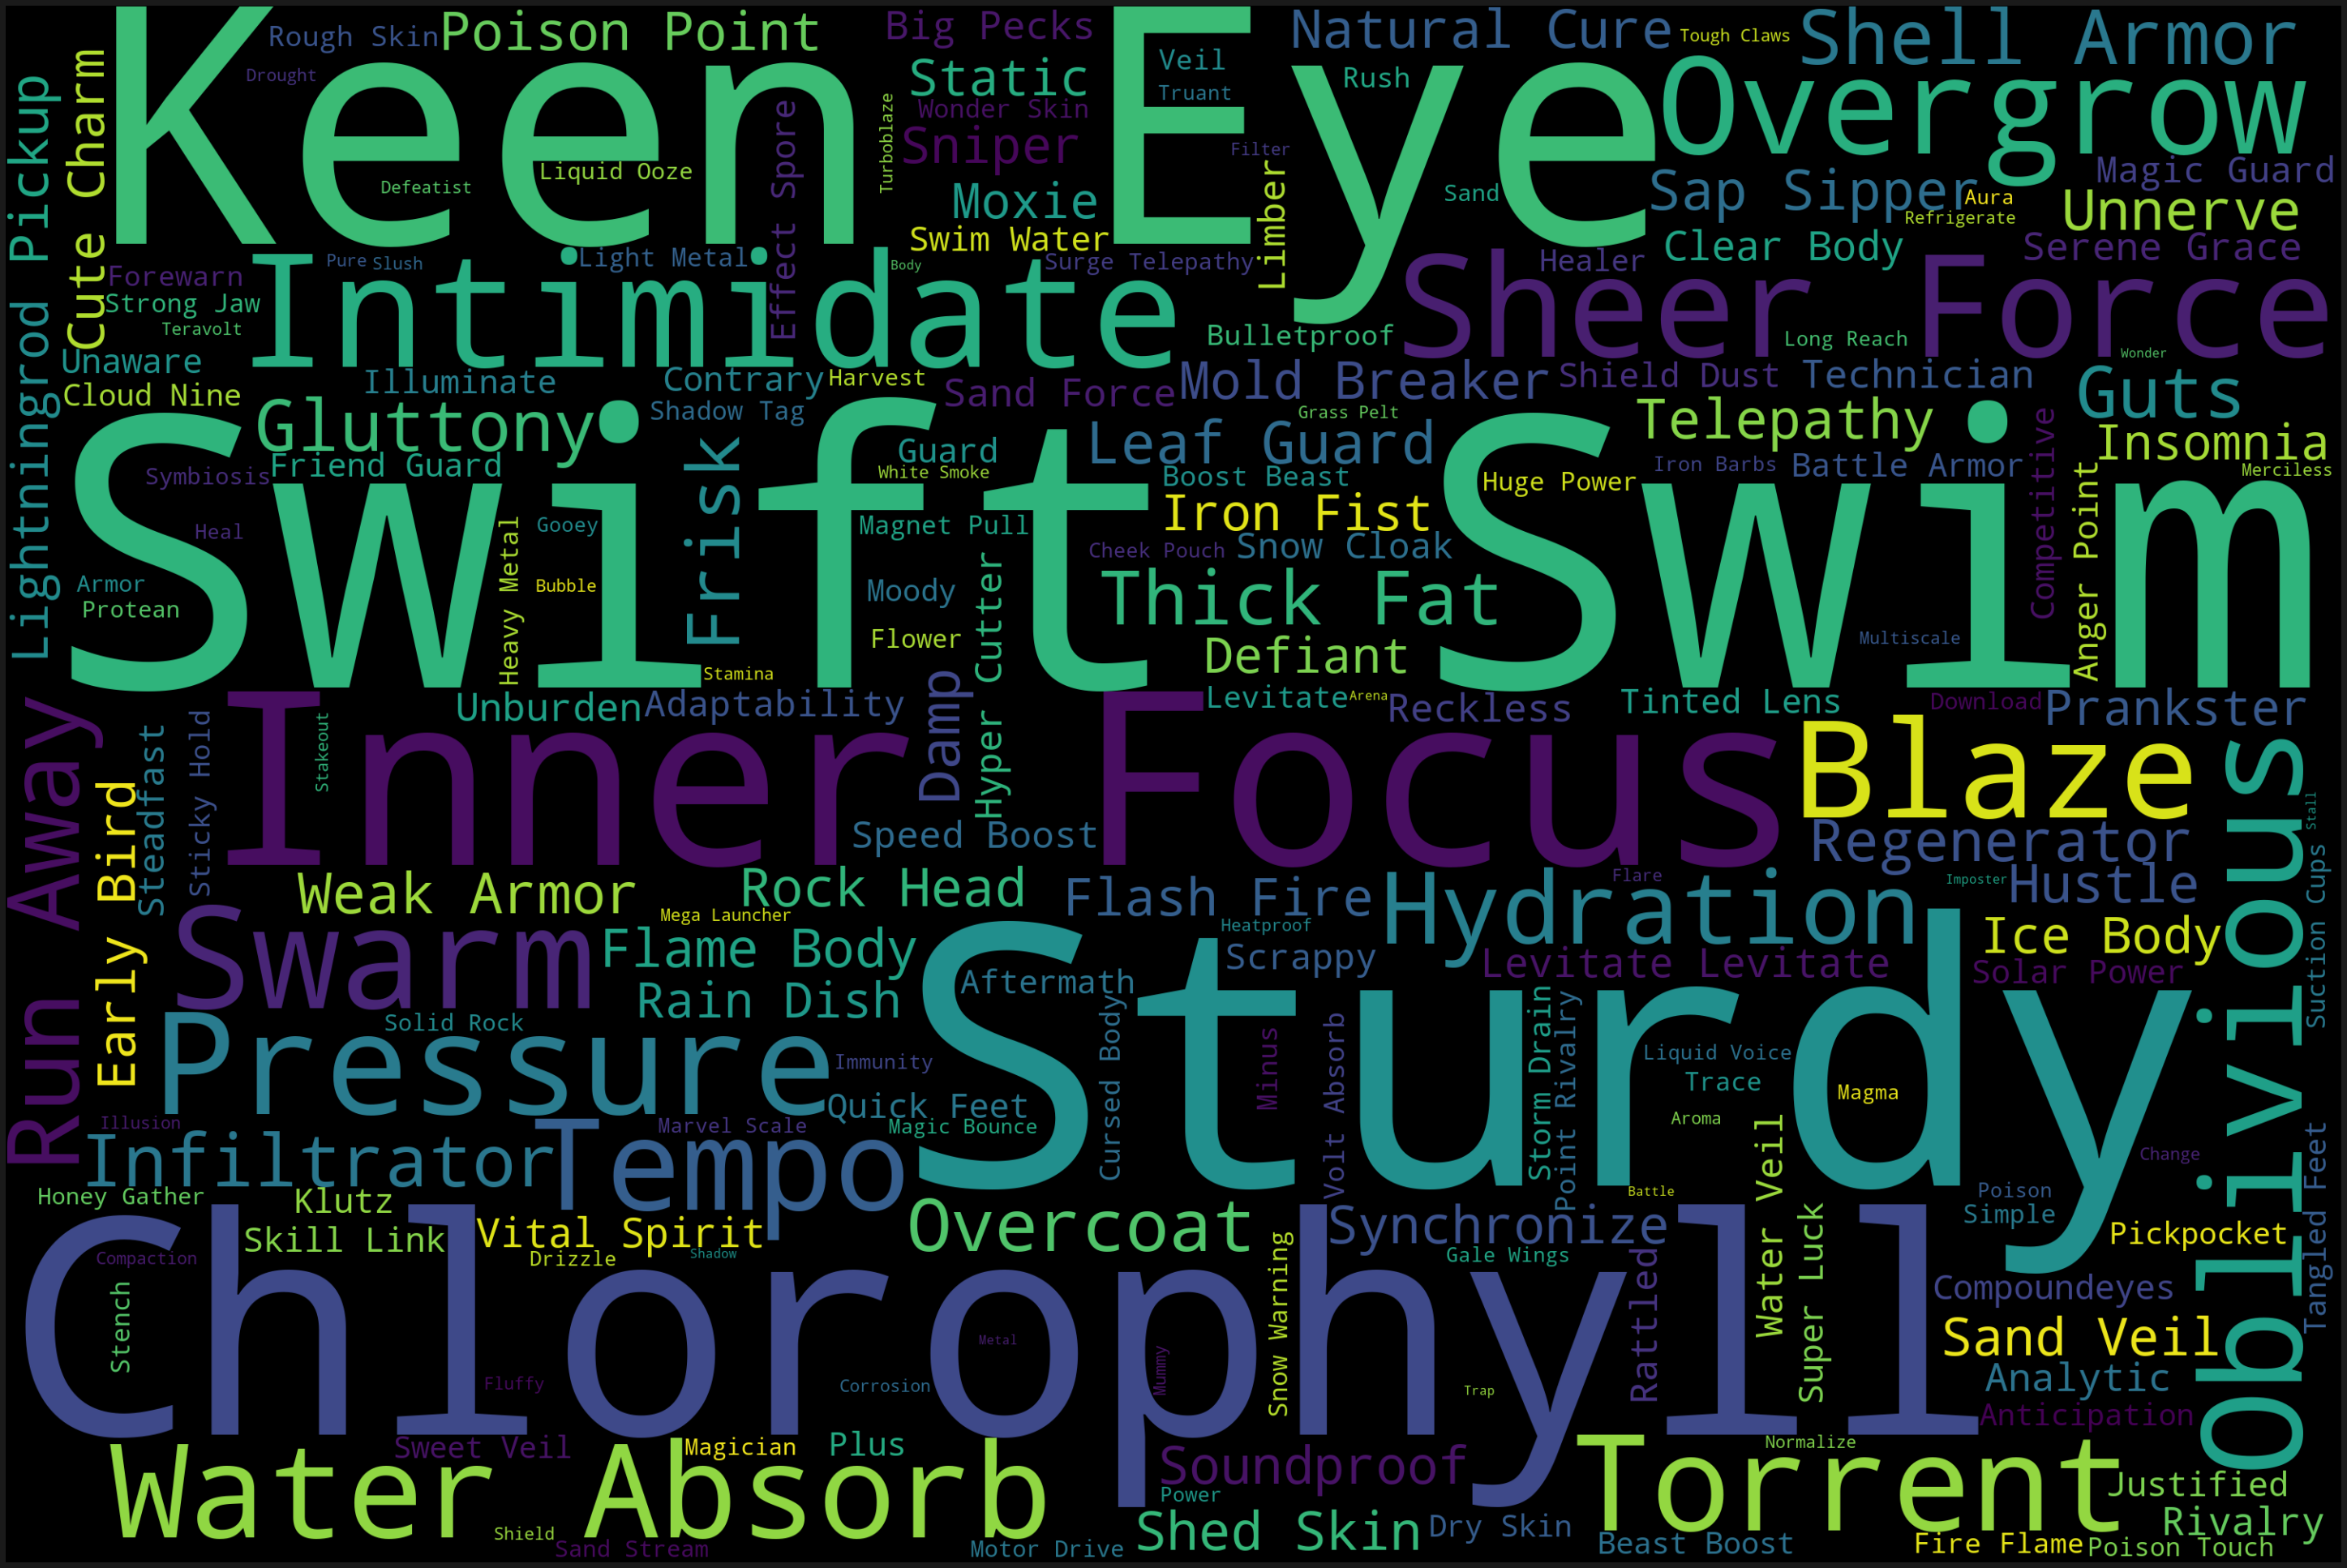

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = pokemon.abilities.str.findall(r'\'([A-Za-z ]*)\'')
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
pokemon[['classfication','name']].groupby('classfication').count()

name
classfication              
Abundance Pokémon         1
Acorn Pokémon             1
Alpha Pokémon             1
Angler Pokémon            1
Ant Pit Pokémon           1
Anteater Pokémon          1
Antenna Pokémon           1
Aquamouse Pokémon         1
Aquarabbit Pokémon        1
Arm Thrust Pokémon        1
Armor Bird Pokémon        1
Armor Pokémon             2
Arrow Quill Pokémon       1
Artificial Pokémon        1
Astral Body Pokémon       1
Atrocious Pokémon         1
Attaching Pokémon         1
Aura Pokémon              1
Aurora Pokémon            1
Automaton Pokémon         2
Avianoid Pokémon          1
Axe Jaw Pokémon           2
Bagworm Pokémon           4
Ball Pokémon              2
Ball Roll Pokémon         1
Ball Whale Pokémon        1
Balloon Pokémon           5
Barnacle Pokémon          1
Barrier Pokémon           1
Bash Buffalo Pokémon      1
Bat Pokémon               4
Battery Pokémon           1
Beak Pokémon              1
Beaver Pokémon            1
Beckon Pokémon            1
Bee Fly Pokémon           2
Beehive Pokémon           1
Bell Pokémon              1
Big Boss Pokémon          1
Big Eater Pokémon         1
Big Horn Pokémon          1
Big Jaw Pokémon           3
Big Voice Pokémon         1
Big-Hearted Pokémon       1
Bird Pokémon              2
Bite Pokémon              2
Bivalve Pokémon           3
Blade Pokémon             1
Blade Quill Pokémon       1
Blast Pokémon             1
Blast Turtle Pokémon      1
Blaze Pokémon             1
Blazing Pokémon           1
Blimp Pokémon             1
Bloom Sickle Pokémon      1
Blossom Pokémon           1
Bolt Strike Pokémon       1
Bone Vulture Pokémon      1
Bonsai Pokémon            1
Bounce Pokémon            1
Boundary Pokémon          1
Bouquet Pokémon           1
Boxing Pokémon            1
Bright Pokémon            1
Bronze Bell Pokémon       1
Bronze Pokémon            1
Brutal Pokémon            2
Brutal Star Pokémon       2
Bubble Frog Pokémon       2
Bubble Jet Pokémon        1
Bud Pokémon               1
Bug Catcher Pokémon       1
Bugle Beak Pokémon        1
Bulb Pokémon              1
Butterfly Pokémon         2
Cactus Pokémon            2
Candle Pokémon            1
Cannon Pokémon            1
Carefree Pokémon          1
Caring Pokémon            1
Cat Ferret Pokémon        1
Catty Pokémon             1
Cavalry Pokémon           1
Cave Pokémon              2
Cavern Pokémon            1
Cell Pokémon              1
Centipede Pokémon         1
Cerebral Pokémon          2
Cheering Pokémon          2
Cherry Pokémon            1
Chick Pokémon             1
Chill Pokémon             1
Chimp Pokémon             1
Chinchilla Pokémon        1
Clamping Pokémon          1
Clap Pokémon              1
Clay Doll Pokémon         2
Clear Wing Pokémon        1
Coal Pokémon              1
Cobra Pokémon             1
Cocoon Pokémon            4
Coffin Pokémon            1
Collective Pokémon        1
Color Swap Pokémon        1
Colossal Pokémon          1
Colt Pokémon              1
Compass Pokémon           2
Compressed Pokémon        1
Constraint Pokémon        1
Continent Pokémon         2
Coral Pokémon             1
Cotton Bird Pokémon       1
Cotton Candy Pokémon      1
Cotton Puff Pokémon       1
Cottonweed Pokémon        3
Courting Pokémon          1
Cricket Pokémon           2
Cruel Pokémon             1
Crystallizing Pokémon     1
Curlipede Pokémon         1
Cyclone Pokémon           1
DNA Pokémon               1
Dancing Pokémon           1
Dark Pokémon              2
Darkness Pokémon          2
Daunting Pokémon          1
Deceiver Pokémon          1
Deep Black Pokémon        1
Deep Sea Pokémon          1
Delivery Pokémon          1
Desert Croc Pokémon       2
Despot Pokémon            1
Destruction Pokémon       1
Devious Pokémon           1
Diapered Pokémon          1
Digging Pokémon           2
Disaster Pokémon          1
Discharge Pokémon         1
Discipline Pokémon        1
Disguise Pokémon          1
Diving Pokémon            1
Donkey Pokémon     

In [35]:
pokemon[['name']][pokemon['is_legendary'] == 1]

name
143    Articuno
144      Zapdos
145     Moltres
149      Mewtwo
150         Mew
242      Raikou
243       Entei
244     Suicune
248       Lugia
249       Ho-Oh
250      Celebi
376    Regirock
377      Regice
378   Registeel
379      Latias
380      Latios
381      Kyogre
382     Groudon
383    Rayquaza
384     Jirachi
385      Deoxys
479        Uxie
480     Mesprit
481       Azelf
482      Dialga
483      Palkia
484     Heatran
485   Regigigas
486    Giratina
487   Cresselia
489     Manaphy
490     Darkrai
491     Shaymin
492      Arceus
493     Victini
637    Cobalion
638   Terrakion
639    Virizion
640    Tornadus
641   Thundurus
642    Reshiram
643      Zekrom
644    Landorus
645      Kyurem
646      Keldeo
647    Meloetta
648    Genesect
715     Xerneas
716     Yveltal
717     Zygarde
718     Diancie
720   Volcanion
784   Tapu Koko
785   Tapu Lele
786   Tapu Bulu
787   Tapu Fini
788      Cosmog
789     Cosmoem
790    Solgaleo
791      Lunala
792    Nihilego
793    Buzzwole
794   Pheromosa
795   Xurkitree
796  Celesteela
797     Kartana
798    Guzzlord
799    Necrozma
800    Magearna

In [36]:
consolidate_type2_leg = pokemon[['type2','is_legendary']][(pokemon['is_legendary'] == 1) & (pokemon['type2'] != 'NA')].groupby('type2').count().sort_values(by='type2',ascending = False)
consolidate_type2_leg

is_legendary
type2                 
water                1
steel                4
psychic              4
poison               1
ice                  1
ground               1
grass                2
ghost                1
flying              10
fire                 2
fighting             6
fairy                6
electric             1
dragon               4

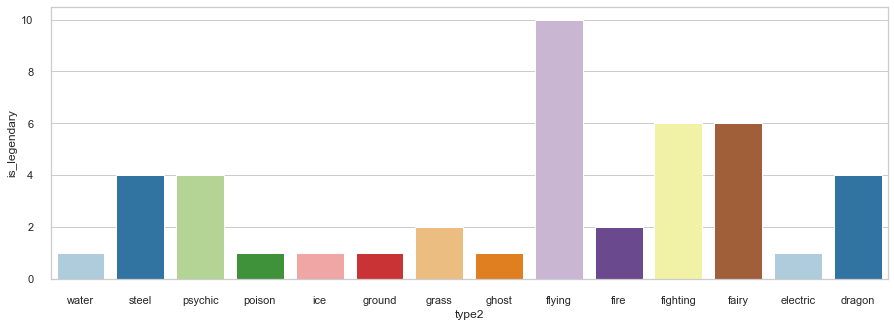

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x=consolidate_type2_leg.index,y=consolidate_type2_leg['is_legendary'], palette=sns.color_palette("Paired"))


In [38]:
consolidate_type1_leg = pokemon[['type1','is_legendary']][(pokemon['is_legendary'] == 1)].groupby('type1').count().sort_values(by='type1',ascending = False)

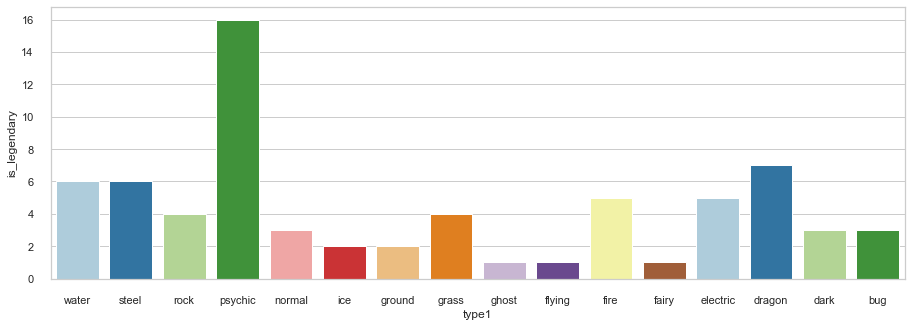

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15.3, 5)
sns.barplot(x=consolidate_type1_leg.index,y=consolidate_type1_leg['is_legendary'], palette=sns.color_palette("Paired"))


In [40]:
pokemon[['percentage_male','name']].groupby('percentage_male',).count()

name
percentage_male      
-1.0               97
 0.0               27
 11.2               2
 24.6              22
 50.0             484
 75.4              19
 88.1             111
 100.0             19

In [41]:
pokemon[['name','base_total']].sort_values('base_total' , ascending=False)[:10]

name  base_total
149     Mewtwo         780
383   Rayquaza         780
382    Groudon         770
381     Kyogre         770
492     Arceus         720
717    Zygarde         708
380     Latios         700
247  Tyranitar         700
444   Garchomp         700
379     Latias         700

In [42]:
pokemon['No_of_abilities'] = pokemon['abilities'].transform(lambda x:len(x.split(',')))

In [43]:
pokemon.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total  capture_rate   classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  is_legendary  No_of_abilities
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318            45    Seed Pokémon       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45  grass  poison        6.9           1             0                2
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405            45    Seed Pokémon       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60  grass  poison       13.0           1             0                2
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625            45    Seed Pokémon      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80  grass  poison      100.0           1             0                2
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309            45  Lizard Pokémon       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65   fire      NA        8.5           1             0                2
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405            45   Flame Pokémon       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80   fire      NA       19.0           1             0                2

In [44]:
pokemon['type2'].replace('NA','0')

0        poison
1        poison
2        poison
3             0
4             0
5        flying
6             0
7             0
8             0
9             0
10            0
11       flying
12       poison
13       poison
14       poison
15       flying
16       flying
17       flying
20       flying
21       flying
22            0
23            0
24            0
28            0
29            0
30       ground
31            0
32            0
33       ground
34            0
35            0
38        fairy
39        fairy
40       flying
41       flying
42       poison
43       poison
44       poison
45        grass
46        grass
47       poison
48       poison
53            0
54            0
55            0
56            0
57            0
58            0
59            0
60            0
61     fighting
62            0
63            0
64            0
65            0
66            0
67            0
68       poison
69       poison
70       poison
71       poison
72       poison
76      

In [45]:
#converted categor
category = ['classfication','type1','type2']

for i in category:
    pokemon[i] = pokemon[i].astype('category')
    pokemon[i] = pokemon[i].cat.codes

In [46]:
pokemon.head()

abilities  against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total  capture_rate  classfication  defense  experience_growth  height_m  hp     japanese_name        name  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1  type2  weight_kg  generation  is_legendary  No_of_abilities
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      49            5120              70         318            45            441       49            1059860       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1               1         65          65     45      9     14        6.9           1             0                2
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5      62            5120              70         405            45            441       63            1059860       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1               2         80          80     60      9     14       13.0           1             0                2
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0               0.5            0.5            0.5           2.0             2.0            1.0           0.25             1.0          2.0             1.0             1.0              2.0           1.0            1.0            0.5     100            5120              70         625            45            441      123            1059860       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1               3        122         120     80      9     14      100.0           1             0                2
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      52            5120              70         309            45            295       43            1059860       0.6  39      Hitokageヒトカゲ  Charmander             88.1               4         60          50     65      6      0        8.5           1             0                2
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0               1.0            0.5            1.0           0.5             1.0            1.0           0.50             2.0          0.5             1.0             1.0              1.0           2.0            0.5            2.0      64            5120              70         405            45            183       58            1059860       1.1  58       Lizardoリザード  Charmeleon             88.1               5         80          65     80      6      0       19.0           1             0                2

In [47]:
pokemon.drop(['abilities','japanese_name','name'],axis=1,inplace = True)

In [48]:
pokemon

against_bug  against_dark  against_dragon  against_electric  against_fairy  against_fight  against_fire  against_flying  against_ghost  against_grass  against_ground  against_ice  against_normal  against_poison  against_psychic  against_rock  against_steel  against_water  attack  base_egg_steps  base_happiness  base_total  capture_rate  classfication  defense  experience_growth  height_m   hp  percentage_male  pokedex_number  sp_attack  sp_defense  speed  type1  type2  weight_kg  generation  is_legendary  No_of_abilities
0           1.00          1.00             1.0              0.50           0.50           0.50          2.00            2.00            1.0           0.25            1.00         2.00            1.00            1.00             2.00          1.00           1.00           0.50      49            5120              70         318            45            441       49            1059860       0.7   45             88.1               1         65          65     45      9     14        6.9           1             0                2
1           1.00          1.00             1.0              0.50           0.50           0.50          2.00            2.00            1.0           0.25            1.00         2.00            1.00            1.00             2.00          1.00           1.00           0.50      62            5120              70         405            45            441       63            1059860       1.0   60             88.1               2         80          80     60      9     14       13.0           1             0                2
2           1.00          1.00             1.0              0.50           0.50           0.50          2.00            2.00            1.0           0.25            1.00         2.00            1.00            1.00             2.00          1.00           1.00           0.50     100            5120              70         625            45            441      123            1059860       2.0   80             88.1               3        122         120     80      9     14      100.0           1             0                2
3           0.50          1.00             1.0              1.00           0.50           1.00          0.50            1.00            1.0           0.50            2.00         0.50            1.00            1.00             1.00          2.00           0.50           2.00      52            5120              70         309            45            295       43            1059860       0.6   39             88.1               4         60          50     65      6      0        8.5           1             0                2
4           0.50          1.00             1.0              1.00           0.50           1.00          0.50            1.00            1.0           0.50            2.00         0.50            1.00            1.00             1.00          2.00           0.50           2.00      64            5120              70         405            45            183       58            1059860       1.1   58             88.1               5         80          65     80      6      0       19.0           1             0                2
5           0.25          1.00             1.0              2.00           0.50           0.50          0.50            1.00            1.0           0.25            0.00         1.00            1.00            1.00             1.00          4.00           0.50           2.00     104            5120              70         634            45            183       78            1059860       1.7   78             88.1               6        159         115    100      6      8       90.5           1             0                2
6           1.00          1.00             1.0              2.00           1.00           1.00          0.50            1.00            1.0           2.00            1.00         0.50            1.00            1.00             1.00          1.00           0.50           0.50     

In [49]:
X = pokemon.drop(['is_legendary'],axis = 1)
y = pokemon['is_legendary']


In [50]:
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [51]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_lr_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_lr_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_lr_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_lr_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_lr_pred)))

[[146   0]
 [  3   8]]
Precision score: 1.0000
Recall score: 0.7273
Accuracy score: 0.9809
F1 score: 0.8421


C:\Users\palas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_nb_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_nb_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_nb_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_nb_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_nb_pred)))

[[143   3]
 [  2   9]]
Precision score: 0.7500
Recall score: 0.8182
Accuracy score: 0.9682
F1 score: 0.7826


In [61]:

# Train the classifier
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

# Predict 
y_svm_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_svm_pred))

print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_svm_pred)))


[[146   0]
 [ 11   0]]
Accuracy score: 0.9299


In [65]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train, y_train)

y_kmeans_pred = kmeans.predict(X_test)

print(confusion_matrix(y_test, y_kmeans_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_kmeans_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_kmeans_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_kmeans_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_kmeans_pred)))

[[119  27]
 [  0  11]]
Precision score: 0.2895
Recall score: 1.0000
Accuracy score: 0.8280
F1 score: 0.4490


In [68]:
kfold = KFold(n_splits=10, random_state=48)

dtclf = tree.DecisionTreeClassifier()
dtclf.fit(X,y)

result = cross_val_score(dtclf, X, y, cv=kfold, scoring='accuracy')

print(confusion_matrix(y_test, y_kmeans_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_kmeans_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_kmeans_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_kmeans_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_kmeans_pred)))

[[119  27]
 [  0  11]]
Precision score: 0.2895
Recall score: 1.0000
Accuracy score: 0.8280
F1 score: 0.4490


In [71]:
rfm = RandomForestClassifier(n_estimators= 70,oob_score=True,n_jobs=-1,random_state = 101,max_features=None,min_samples_leaf=30)
rfm.fit(X_train,y_train)
y_rfm_pred = rfm.predict(X_test)


print(confusion_matrix(y_test, y_rfm_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_rfm_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_rfm_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_rfm_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_rfm_pred)))

[[146   0]
 [  3   8]]
Precision score: 1.0000
Recall score: 0.7273
Accuracy score: 0.9809
F1 score: 0.8421
